In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Check data:


In [2]:
airbnb = pd.read_csv('AB_NYC_2019.csv')

In [3]:
airbnb

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [4]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

#### Data cleaning


In [5]:
airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [6]:
# drop insignificant columns :
airbnb.drop(columns=['id', 'name','host_name','neighbourhood','last_review'],axis = 1, inplace = True)

In [7]:
airbnb['reviews_per_month']=airbnb['reviews_per_month'].fillna(0)

In [8]:
airbnb.isnull().sum()

host_id                           0
neighbourhood_group               0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [9]:
airbnb.head(5)

,host_id,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Manhattan,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,4869,Brooklyn,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Manhattan,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


### Data Visualizations:

#### Neigbourhood:

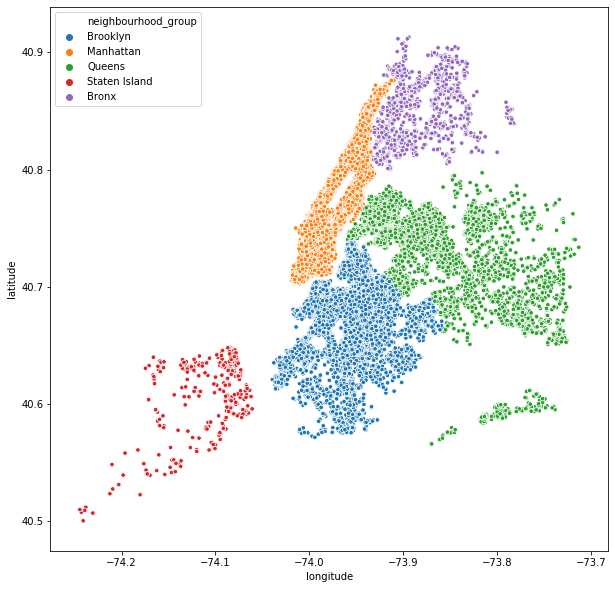

In [10]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='longitude', y='latitude', hue='neighbourhood_group',s=20, data=airbnb)

Text(0.5, 1.0, 'Neighbourhood Group')

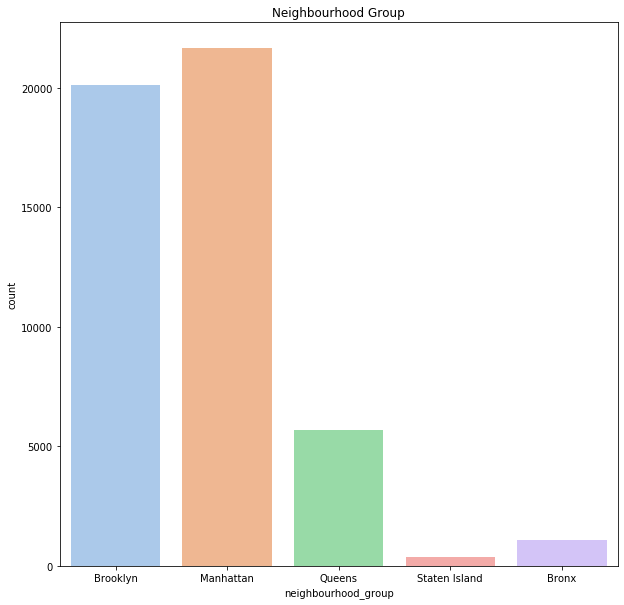

In [11]:
sns.countplot(airbnb['neighbourhood_group'], palette="pastel")
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Neighbourhood Group')

Text(0.5, 1.0, 'Neighbourhood Price')

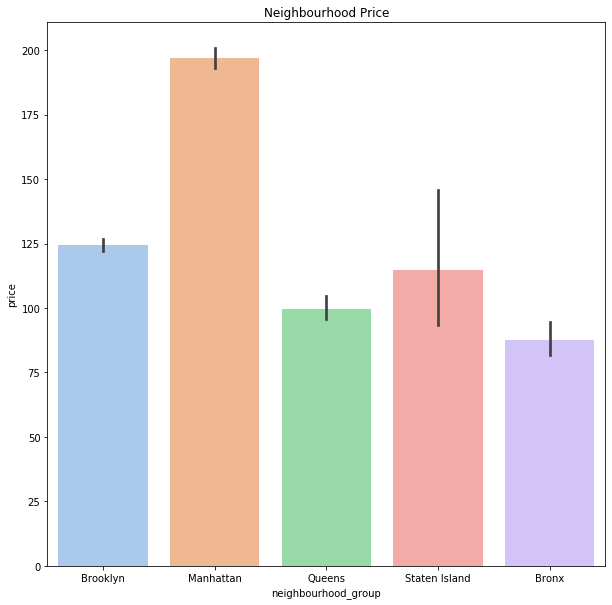

In [12]:
plt.figure(figsize=(10,10))
sns.barplot(x='neighbourhood_group', y='price', data=airbnb, palette="pastel")
fig.set_size_inches(10,10)
plt.title('Neighbourhood Price')

#### Room type:

Text(0.5, 1.0, 'Room Type')

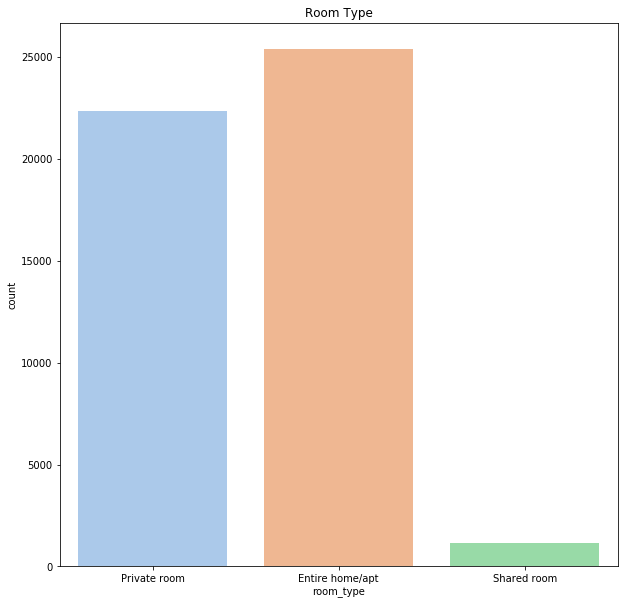

In [13]:
sns.countplot(airbnb['room_type'], palette="pastel")
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Room Type')

Text(0.5, 1.0, 'Room Price')

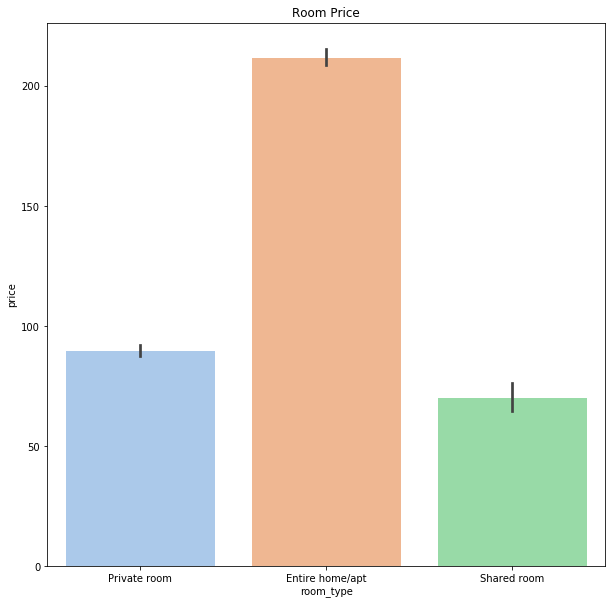

In [14]:
plt.figure(figsize=(10,10))
sns.barplot(x='room_type', y='price', data=airbnb,palette="pastel" )
fig.set_size_inches(10,10)
plt.title('Room Price')

#### Top Hosts :

In [15]:
top_hosts = pd.DataFrame(airbnb['host_id'].value_counts().head(10))

In [16]:
top_hosts.reset_index(inplace=True)
top_hosts.rename(columns={'index':'host_id', 'host_id':'total'}, inplace=True)

In [17]:
top_hosts

,host_id,total
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,12243051,96
5,16098958,96
6,61391963,91
7,22541573,87
8,200380610,65
9,7503643,52


Text(0.5, 1.0, 'Hosts with most listing in NY')

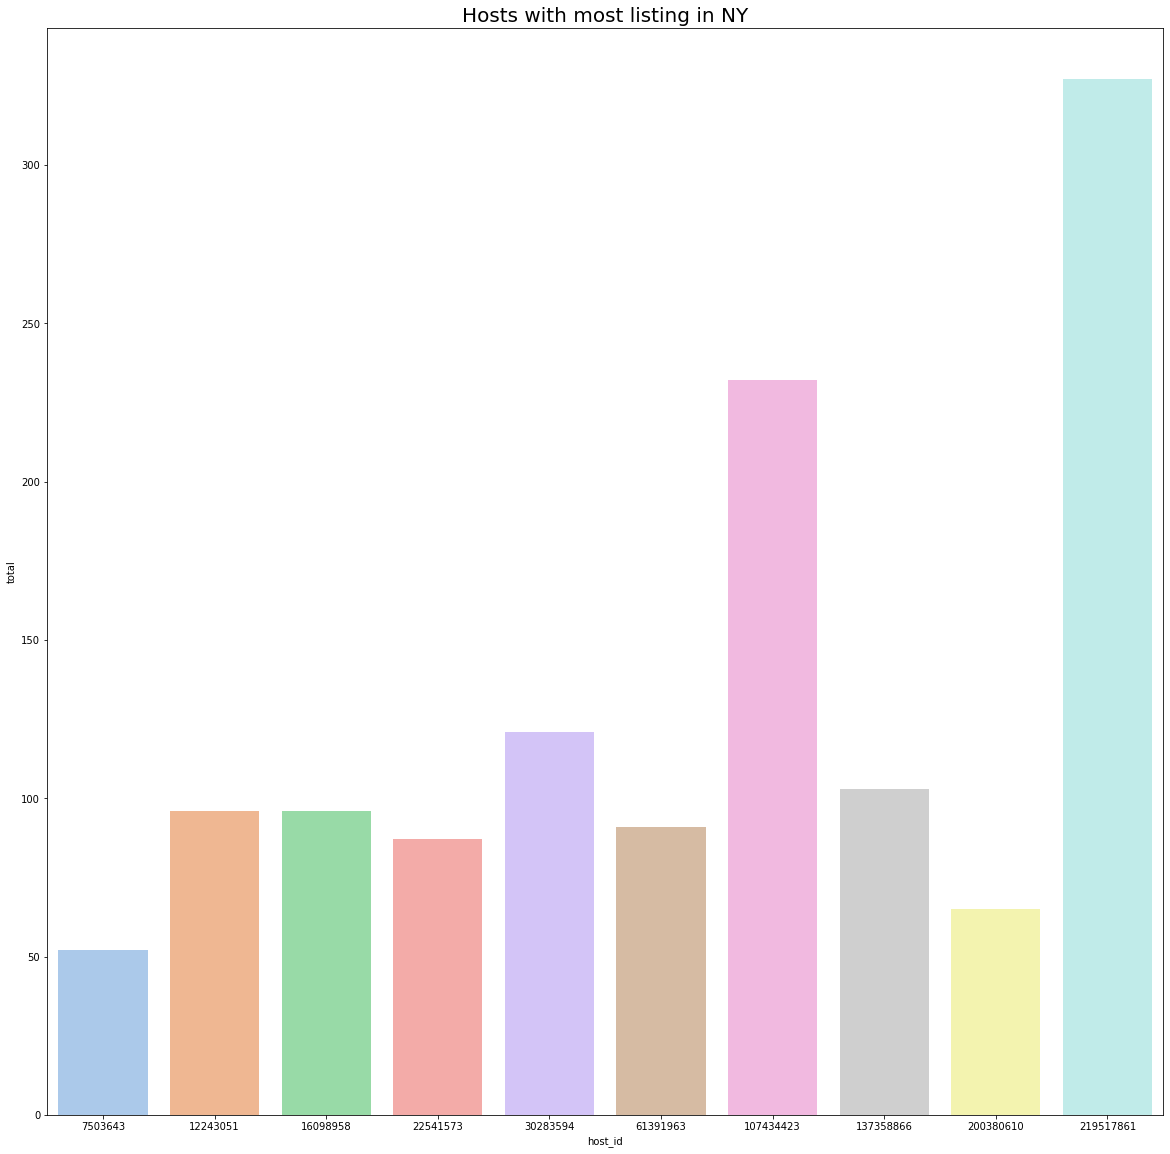

In [24]:
plt.figure(figsize=(20,20))
sns.barplot(x='host_id', y='total', data=top_hosts,palette="pastel" )
fig.set_size_inches(10,10)
plt.title('Hosts with most listing in NY', fontsize=20)

In [29]:
airbnb['number_of_reviews'].value_counts()

0      10052
1       5244
2       3465
3       2520
4       1994
       ...  
404        1
436        1
388        1
341        1
607        1
Name: number_of_reviews, Length: 394, dtype: int64